<a href="https://colab.research.google.com/github/andalmod/Test/blob/main/Bayesian_optimization_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.cs.ubc.ca/~nando/540-2013/lectures/gp.py

In [394]:
from __future__ import division
import numpy as np
from sklearn.metrics import r2_score

""" This is code for simple GP regression. It assumes a zero mean GP Prior """



' This is code for simple GP regression. It assumes a zero mean GP Prior '

In [395]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.pyplot as plt
from numpy import sqrt

# Funciones auxiliares

In [437]:
def dibujar (X,Y,Z,lb,ub):
  plt.figure(figsize=(6,6))
  contours = plt.contour(X, Y, Z, 10, colors='black')
  plt.clabel(contours, inline=True, fontsize=10)

  plt.imshow(Z, extent=[lb,ub,lb,ub], origin='lower',
            cmap='RdGy', alpha=0.5)

  plt.colorbar();


 



In [458]:
def dibujar_p(X,Y,Z,lb,ub,punto):
  plt.figure(figsize=(6,6))
  for point in lista_puntos:
    plt.scatter(point[0],point[1],color='b')
  plt.scatter(punto[0],punto[1],color='r')
  contours = plt.contour(X, Y, Z, 10, colors='black')
  plt.clabel(contours, inline=True, fontsize=10)

  plt.imshow(Z, extent=[lb,ub,lb,ub], origin='lower',
            cmap='RdGy', alpha=0.5)

  
  plt.colorbar();


In [439]:

def f(X):
  x1=X[:,0]
  x2=X[:,1]
  return (1-(x1**2+x2**3))*exp(-(x1**2+x2**2)/2)


# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 5
    param2=1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return param2*np.exp(-.5 * (1/kernelParameter) * sqdist)

    

In [440]:
def GP_Nando(Xtrain,Xtest,y):

  N=len(Xtrain)
  n=len(Xtest)

  # Here comes the magic

  K = kernel(Xtrain, Xtrain)
  L = np.linalg.cholesky(K + s_1*np.eye(N))

  # compute the mean at our test points.
  Lk = np.linalg.solve(L, kernel(Xtrain, Xtest))
  mu = np.dot(Lk.T, np.linalg.solve(L, y))

  # compute the variance at our test points.
  K_ = kernel(Xtest, Xtest)
  s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
  s = np.sqrt(s2)

  return mu,s,K_,Lk

In [441]:
#Steps of bayesian optimization

def step(Xtest,Xtrain,max_ind):

  x_new=Xtest[max_ind]
  Xtrain=np.vstack ((Xtrain,x_new) )
  N=len(Xtrain)
  
  y = f(Xtrain) + s_1*np.random.randn(N)

  mu,s,K_,Lk=GP_Nando(Xtrain,Xtest,y)

  # draw 1 sample from the posterior at our test points, and we use it as utility function
  n=K_.shape[0]
  L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
  u_x = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,1)))

 
  # draw 1 sample from the posterior at our test points, and we use it as utility function
  L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
  u_x = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,1)))

  max_ind=np.argmax(u_x)

  sh_=int(sqrt(len(u_x)))

  Z_=u_x.reshape(sh_,sh_)

  punto=Xtest[max_ind]
  print('maximo:%.2f'%max(u_x))
  lista_puntos.append(punto)

  dibujar_p(X_test,Y_test,Z_,lb,ub,punto) 

  return max_ind,Xtrain

# Código

In [459]:
lista_puntos=[]

lb=-3.0
ub=3.0

s_1 = 0.00005     # noise variance.

#Trainning points

x = arange(lb,ub,3)
y = arange(lb,ub,3)
X_train,Y_train = meshgrid(x, y) # grid of point
x1=X_train.reshape(-1,1)
x2=Y_train.reshape(-1,1)

Xtrain = np.c_[x1,x2]


# Test points


x = arange(lb,ub,0.2)
y = arange(lb,ub,0.2)
X_test,Y_test = meshgrid(x, y) # grid of point
x1=X_test.reshape(-1,1)
x2=Y_test.reshape(-1,1)

Xtest = np.c_[x1,x2]


In [460]:

s_1 = 0.00005     # noise variance.

y = f(Xtrain) + s_1*np.random.randn(len(Xtrain))

In [461]:
mu,s,K_,Lk=GP_Nando(Xtrain,Xtest,y)

In [462]:
y_test=f(Xtest)
y_hat=mu
r2_score(y_test,y_hat)

-1.2512373299541593

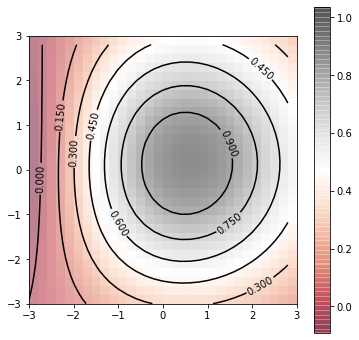

In [463]:
sh_=int(sqrt(len(y_hat)))

Z_=y_hat.reshape(sh_,sh_)

dibujar(X_test,Y_test,Z_,lb,ub)

maximo:1.42


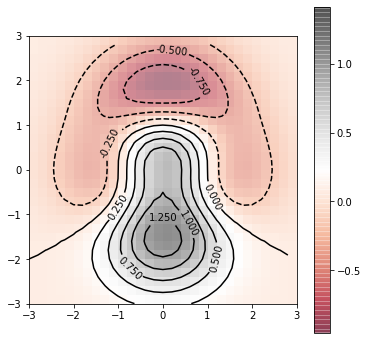

In [464]:
#Dibujamos la función auténtica:
y_real=f(Xtest)

sh_=int(sqrt(len(y_real)))

Z_real=y_real.reshape(sh_,sh_)

dibujar(X_test,Y_test,Z_real,lb,ub)

print('maximo:%.2f'%max(y_real))


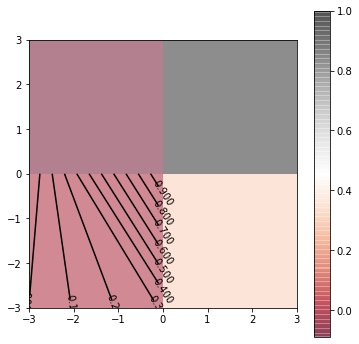

In [465]:
sh_=int(sqrt(len(y)))

Z=y.reshape(sh_,sh_)

dibujar(X_train,Y_train,Z,lb,ub)

In [466]:
# draw 1 sample from the posterior at our test points, and we use it as utility function
n=K_.shape[0]
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
u_x = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,1)))


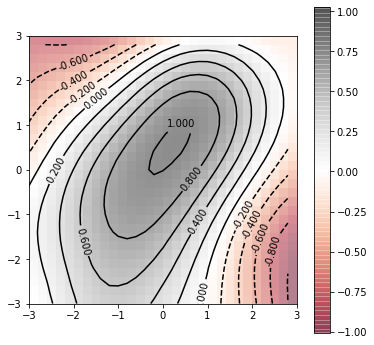

In [467]:
sh_=int(sqrt(len(u_x)))

Z_=u_x.reshape(sh_,sh_)

dibujar(X_test,Y_test,Z_,lb,ub)

In [468]:

max_ind=np.argmax(u_x)

maximo:1.25


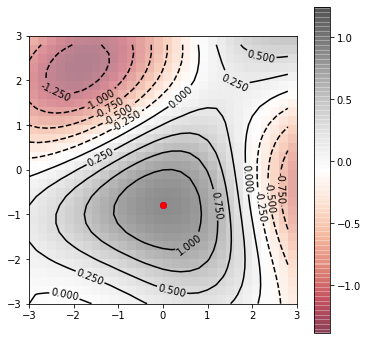

In [469]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.20


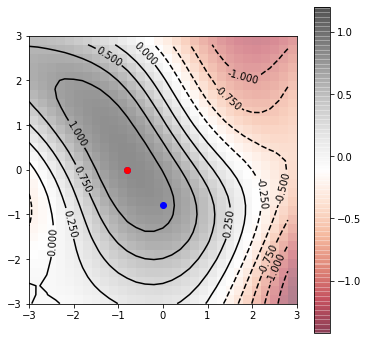

In [470]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:2.39


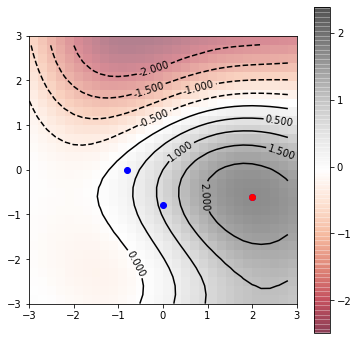

In [471]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.30


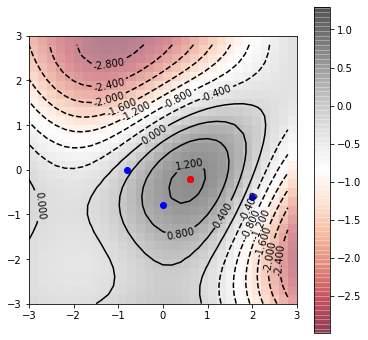

In [472]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:2.74


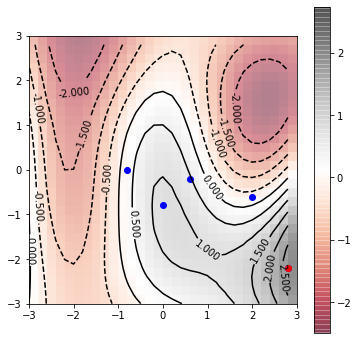

In [473]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.31


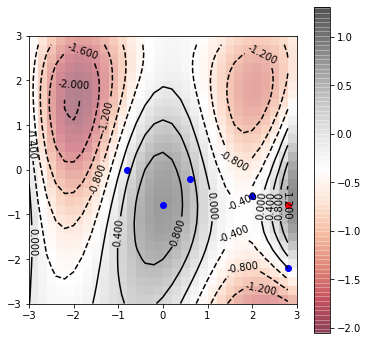

In [474]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.19


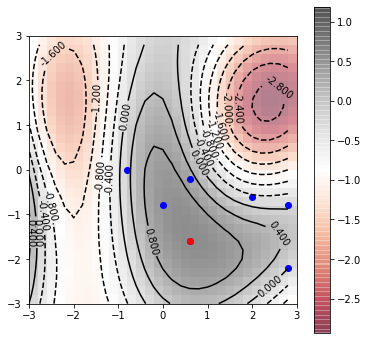

In [475]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.15


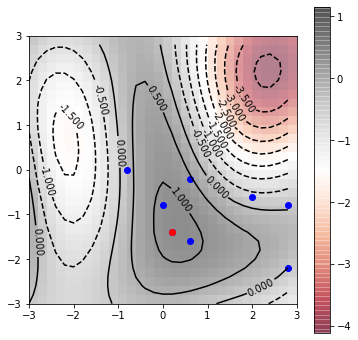

In [476]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.59


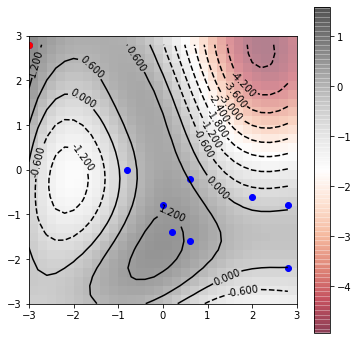

In [477]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.43


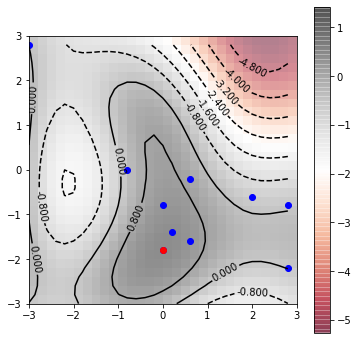

In [478]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.36


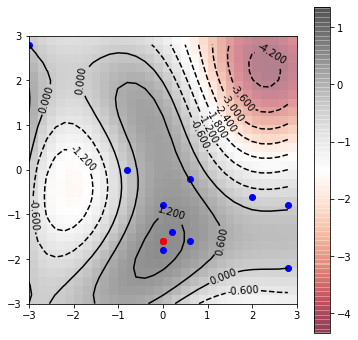

In [479]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.38


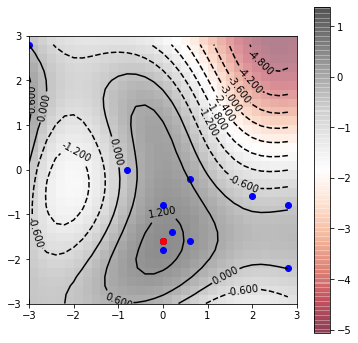

In [480]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.40


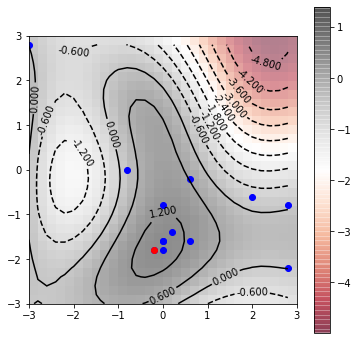

In [481]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.38


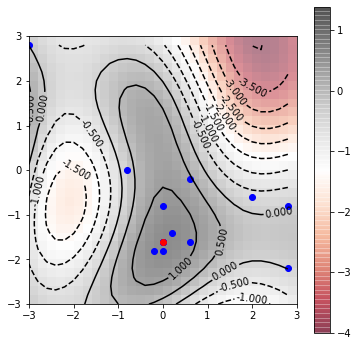

In [482]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.39


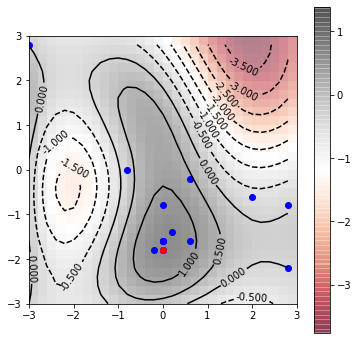

In [483]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.38


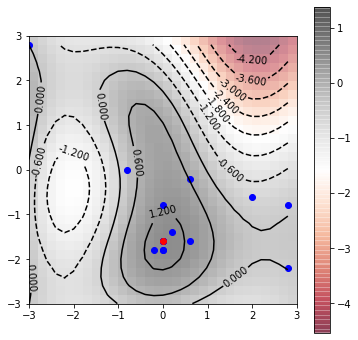

In [484]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.39


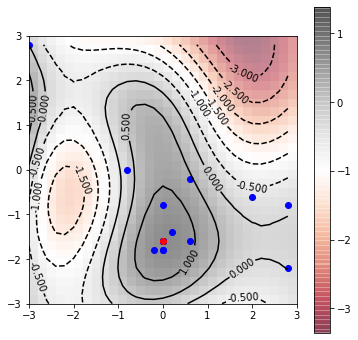

In [485]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.39


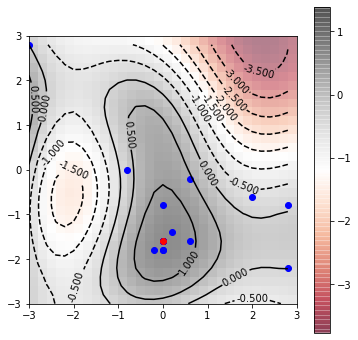

In [486]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)

maximo:1.39


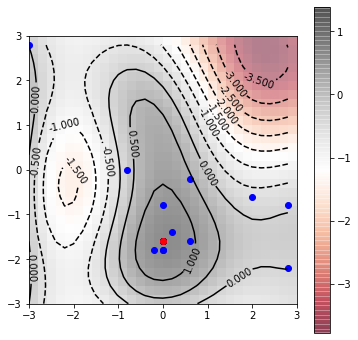

In [487]:
max_ind,Xtrain=step(Xtest,Xtrain,max_ind)